In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageTk

from appJar import gui


# The Data Parsing pipeline

In [2]:
def data_to_parse(filepath):
    data=pd.read_csv(filepath, header = None)
    data.dropna(axis='columns',thresh=10,inplace=True)
    data.dropna(axis='rows',how='any',inplace=True)
    data.columns=['4.3um','3.8um','2.7um','UV','none1','none2','none3','4.3um25hz','3.8um25hz','2.7um25hz','DC','none4']
    parsed={'Ch1':data['4.3um'],'Ch2':data['3.8um'],'Ch3':data['2.7um'],'UV':data['UV']}
    df=pd.DataFrame(parsed)
    return df

In [3]:
def df_to_graph(df,plotname):
    fig = app.addPlotFig(plotname)
    ax = fig.add_subplot(111)
    ax.plot('Ch1',data=df,color='red')
    ax.plot('Ch2',data=df,color='green')
    ax.plot('Ch3',data=df,color='blue')
    ax.plot('UV',data=df,color='orange')
    ax.set_title(plotname)

In [4]:
def df_to_numpyarr(df,imgname):
    df['maxir']=df[['um43','um38','um27']].max(axis=1)
    maxIR=df.maxir.max()
    if maxIR >255:
        scaling_factor=maxIR/255
    else: 
        scaling_factor =1
    df['s43']=(df['um43']/scaling_factor).round().astype(int)
    df['s38']=(df['um38']/scaling_factor).round().astype(int)
    df['s27']=(df['um27']/scaling_factor).round().astype(int)
    numpyarr=df[['s43','s38','s27']].to_numpy().astype(np.uint8)
    numpyarrlen=len(nparr)
    
    numpyarr=numpyarr.reshape(1,numpyarrlen,3)
    for i in range(5):
        numpyarr=np.vstack((nparr,nparr))
    return numpyarr

In [ ]:
def numpyarr_to_image(numpyarr,start=0,end=500):
    

In [5]:
df_to_graph(data_to_parse("polypropylene3ir_hand_ligter_ethanol_hept.txt"),'plot1')

In [23]:
unparsed=pd.read_csv("polypropylene3ir_hand_ligter_ethanol_hept.txt", header = None)

In [37]:
unparsed.dropna(axis='columns',thresh=10,inplace=True)
unparsed.dropna(axis='rows',how='any',inplace=True)

unparsed.columns=['4.3um','3.8um','2.7um','UV','none1','none2','none3','4.3um25hz','3.8um25hz','2.7um25hz','DC','none4']

In [38]:
unparsed.head()

,4.3um,3.8um,2.7um,UV,none1,none2,none3,4.3um25hz,3.8um25hz,2.7um25hz,DC,none4
0,1.8770,1.3429,1.7081,0,T-H,0.0,0.0,1.2782,1.1375,1.0231,16277.0,160.0
1,1.6586,1.5536,1.7207,0,T-H,0.0,0.0,1.1793,1.1267,1.0629,16277.0,160.0
2,1.6586,1.5536,1.7207,0,T-H,0.0,0.0,1.1793,1.1267,1.0629,16277.0,160.0
3,1.7369,1.7027,1.9061,0,T-H,0.0,0.0,1.2090,1.1917,1.1147,16267.0,160.0
4,1.7487,1.5164,1.8708,0,T-H,0.0,0.0,1.3263,1.2142,1.1729,16267.0,160.0


In [6]:
data={'um43':unparsed['4.3um'],'um38':unparsed['3.8um'],'um27':unparsed['2.7um'],'UV':unparsed['UV']}
df = pd.DataFrame(data) 

In [7]:
df.head()

,um43,um38,um27,UV
0,1.8770,1.3429,1.7081,0
1,1.6586,1.5536,1.7207,0
2,1.6586,1.5536,1.7207,0
3,1.7369,1.7027,1.9061,0
4,1.7487,1.5164,1.8708,0


In [8]:
df['maxir']=df[['um43','um38','um27']].max(axis=1)

In [9]:
maxIR=df.maxir.max()
if maxIR >255:
    scaling_factor=maxIR/255
else: 
    scaling_factor =1
print(scaling_factor)

4.7413188235294115


In [10]:
df['s43']=(df['um43']/scaling_factor).round().astype(int)
df['s38']=(df['um38']/scaling_factor).round().astype(int)
df['s27']=(df['um27']/scaling_factor).round().astype(int)

In [11]:
df.reset_index().head()

,index,um43,um38,um27,UV,maxir,s43,s38,s27
0,0,1.8770,1.3429,1.7081,0,1.8770,0,0,0
1,1,1.6586,1.5536,1.7207,0,1.7207,0,0,0
2,2,1.6586,1.5536,1.7207,0,1.7207,0,0,0
3,3,1.7369,1.7027,1.9061,0,1.9061,0,0,0
4,4,1.7487,1.5164,1.8708,0,1.8708,0,0,0


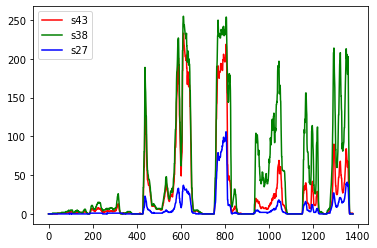

In [12]:
plt.plot('s43',data=df,color='red')
plt.plot('s38',data=df,color='green')
plt.plot('s27',data=df,color='blue')
plt.legend()
plt.show()

In [13]:
nparr=df[['s43','s38','s27']].to_numpy().astype(np.uint8)

In [14]:
originallength=len(nparr)
print(len(nparr))
print(nparr.shape)
nparr=nparr.reshape(1,originallength,3)
for i in range(5):
    nparr=np.vstack((nparr,nparr))

print(nparr.shape)



1380
(1380, 3)
(32, 1380, 3)


In [15]:
im = Image.fromarray(nparr)
im.show()

# The GUI 

### instantiating the gui

In [5]:
app = gui('Window', '1000x800')
app.addLabel("title", "Sensor Data Exploration tool")
app.setLabelBg("title", "White")
app.setBg('silver')

2020-12-18 21:39:24,941 appJar:WARNING [799/_checkMode]: Interactive mode is not fully tested, some features might not work.
2020-12-18 21:39:24,944 appJar:WARNING [810/_checkMode]: iPython is not fully tested, some features might not work.


### buttons definitions and functions

In [ ]:
def press(button):
    if button == 'Open':
        filename= app.openBox('Select Detector Data File', dirName=None, fileTypes=[('text','*.txt'),('text','*.csv')],asFile=True, parent=None, multiple=False, mode='w')

In [17]:
app.addButton('Open', press)
filename = app.openBox('Select Detector Data File')

NameError: name 'press' is not defined

In [6]:
photo = ImageTk.PhotoImage(im)
app.addImageData("pic", photo, fmt="PhotoImage")


NameError: name 'im' is not defined

In [6]:
app.go()


In [ ]:
pyinstaller --add-data "arcweldingsim.txt:." --add-data "blackbodysim.txt:." --add-data "halogensim.txt:." --add-data "flourescentLamp6inrandommod.txt:." --add-data "acetylene.txt:." --add-data "methane.txt:." simple1.py